# K均值算法（K-means）聚类

## 【关键词】K个种子，均值

之前的算法：X_train(数据)----->y_train(目标值): 监督式学习，目标明确
    
K-means无监督，自学    

## 一、K-means算法原理

### 聚类的概念：一种无监督的学习，事先不知道类别，自动将相似的对象归到同一个簇中。

K-Means算法是一种聚类分析（cluster analysis）的算法，其主要是来计算数据聚集的算法，主要通过不断地取离种子点最近均值的算法。

K-Means算法主要解决的问题如下图所示。我们可以看到，在图的左边有一些点，我们用肉眼可以看出来有四个点群，但是我们怎么通过计算机程序找出这几个点群来呢？于是就出现了我们的K-Means算法

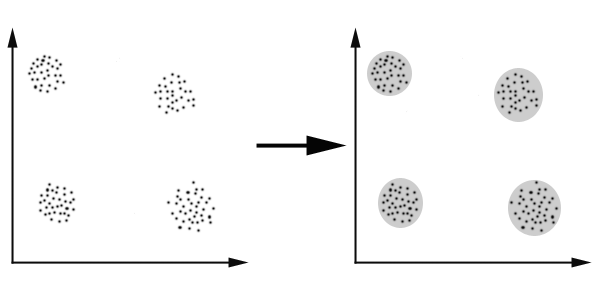

这个算法其实很简单，如下图所示：

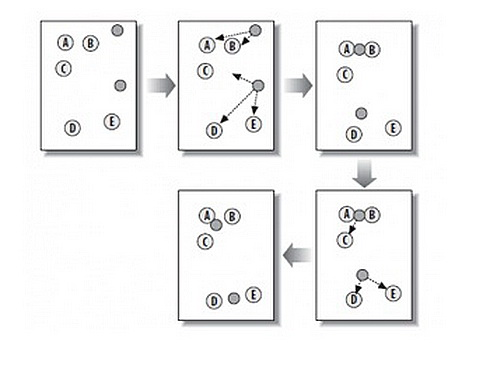

从上图中，我们可以看到，A，B，C，D，E是五个在图中点。而灰色的点是我们的种子点，也就是我们用来找点群的点。有两个种子点，所以K=2。

然后，K-Means的算法如下：

1. 随机在图中取K（这里K=2）个种子点。
2. 然后对图中的所有点求到这K个种子点的距离，假如点Pi离种子点Si最近，那么Pi属于Si点群。（上图中，我们可以看到A，B属于上面的种子点，C，D，E属于下面中部的种子点）
3. 接下来，我们要移动种子点到属于他的“点群”的中心。（见图上的第三步）
4. 然后重复第2）和第3）步，直到，种子点没有移动（我们可以看到图中的第四步上面的种子点聚合了A，B，C，下面的种子点聚合了D，E）。

这个算法很简单，重点说一下“求点群中心的算法”：欧氏距离（Euclidean Distance）：差的平方和的平方根

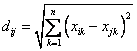


### K-Means主要最重大的缺陷——都和初始值有关：

K是事先给定的，这个K值的选定是非常难以估计的。很多时候，事先并不知道给定的数据集应该分成多少个类别才最合适。（ISODATA算法通过类的自动合并和分裂，得到较为合理的类型数目K）

K-Means算法需要用初始随机种子点来搞，这个随机种子点太重要，不同的随机种子点会有得到完全不同的结果。（K-Means++算法可以用来解决这个问题，其可以有效地选择初始点）

### 总结：K-Means算法步骤：

1. 从数据中选择k个对象作为初始聚类中心;
2. 计算每个聚类对象到聚类中心的距离来划分；
3. 再次计算每个聚类中心
4. 计算标准测度函数，直到达到最大迭代次数，则停止，否则，继续操作。
5. 确定最优的聚类中心

### K-Means算法应用

看到这里，你会说，K-Means算法看来很简单，而且好像就是在玩坐标点，没什么真实用处。而且，这个算法缺陷很多，还不如人工呢。是的，前面的例子只是玩二维坐标点，的确没什么意思。但是你想一下下面的几个问题：

1）如果不是二维的，是多维的，如5维的，那么，就只能用计算机来计算了。

2）二维坐标点的X，Y 坐标，其实是一种向量，是一种数学抽象。现实世界中很多属性是可以抽象成向量的，比如，我们的年龄，我们的喜好，我们的商品，等等，能抽象成向量的目的就是可以让计算机知道某两个属性间的距离。如：我们认为，18岁的人离24岁的人的距离要比离12岁的距离要近，鞋子这个商品离衣服这个商品的距离要比电脑要近，等等。

## 二、实战

重要参数：
- n_clusters：聚类的个数

重要属性：
- cluster_centers_ : [n_clusters, n_features]的数组，表示聚类中心点的坐标
- labels_ : 每个样本点的标签


### 1、聚类实例

导包，使用make_blobs生成随机点cluster_std

In [5]:
import sklearn.datasets as datasets

# cluster  聚类
# k-means 平均值 ,将数据分成了k类
from sklearn.cluster import KMeans

import numpy as np

In [6]:
# 随机生成一些点
X_train,target = datasets.make_blobs(200,centers=4)

建立模型,训练数据，并进行数据预测，使用相同数据

In [7]:
# 算法,无监督学习,自学
# 算法不重要,我们告诉类别,能自动识别
#  n_clusters 聚类数量   
k_means = KMeans(n_clusters=4)

In [8]:
# 无监督学习,没有目标值
k_means.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

无监督的情况下进行计算，预测
现在机器学习没有目标

In [9]:
y_ = k_means.predict(X_train)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

绘制图形，显示聚类结果kmeans.cluster_centers

In [11]:
# 中心点位置
centers = k_means.cluster_centers_
centers

array([[-2.28096145,  2.01991762],
       [ 9.11912832, -9.75879724],
       [ 2.21438538,  3.89146957],
       [ 6.68936778, -2.71230522]])

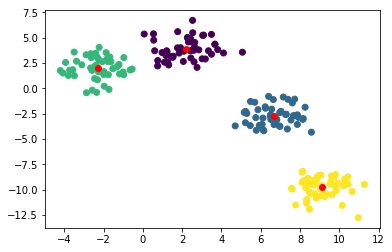

In [12]:
plt.scatter(X_train[:,0],X_train[:,1],c=target)
plt.scatter(centers[:,0],centers[:,1],c='r')

### 2、 实战，三问中国足球几多愁？

导包，3D图像需导包：from mpl_toolkits.mplot3d import Axes3D  
读取数据

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 3D
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

列名修改为："国家","2006世界杯","2010世界杯","2007亚洲杯"

In [14]:
ball = pd.read_csv('../data/AsiaFootball.txt',header=None)
ball.head()

,0,1,2,3
0,中国,50,50,9
1,日本,28,9,4
2,韩国,17,15,3
3,伊朗,25,40,5
4,沙特,28,40,2


In [15]:
ball.columns = ["国家","2006世界杯","2010世界杯","2007亚洲杯"]
ball

,国家,2006世界杯,2010世界杯,2007亚洲杯
0,中国,50,50,9
1,日本,28,9,4
2,韩国,17,15,3
3,伊朗,25,40,5
4,沙特,28,40,2
5,伊拉克,50,50,1
6,卡塔尔,50,40,9
7,阿联酋,50,40,9
8,乌兹别克斯坦,40,40,5
9,泰国,50,50,9


使用K-Means进行数据处理，对亚洲球队进行分组，分三组

In [16]:
# 提取训练数据
X_train = ball[["2006世界杯","2010世界杯","2007亚洲杯"]]
X_train

,2006世界杯,2010世界杯,2007亚洲杯
0,50,50,9
1,28,9,4
2,17,15,3
3,25,40,5
4,28,40,2
5,50,50,1
6,50,40,9
7,50,40,9
8,40,40,5
9,50,50,9


In [17]:
kmeans = KMeans(n_clusters=3)

In [18]:
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
y_ = kmeans.predict(X_train)
y_

array([0, 1, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0])

for循环打印输出分组后的球队，argwhere()

In [20]:
for i in range(3):
    
    # 根据条件来获取索引,返回的是一个数组
    index = np.argwhere(i == y_)
    
    # 根据索引进行数据的输出
    for j in index:
        print(ball['国家'].iloc[j[0]],end = '  ')
    # 换行
    print('\n')

中国  伊拉克  卡塔尔  阿联酋  泰国  越南  阿曼  印尼  

日本  韩国  

伊朗  沙特  乌兹别克斯坦  巴林  朝鲜  



绘制三维立体图形,ax = plt.subplot(projection  = '3d')  
ax.scatter3D()

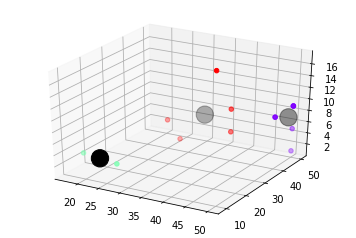

In [21]:
axes3d = plt.subplot(projection='3d')

axes3d.scatter3D(X_train['2006世界杯'],
                 X_train.loc[:,'2010世界杯'],
                 X_train['2007亚洲杯'],
                 c=y_,cmap='rainbow')

# 聚类的中心点
centes = kmeans.cluster_centers_
axes3d.scatter3D(centes[:,0],centes[:,1],centes[:,2],c='black',s=300,cmap=plt.cm.BuPu)

### 3、聚类实践与常见错误

导包，使用make_blobs创建样本点

In [22]:
from sklearn.datasets import make_blobs

In [23]:
X_train,y_train = make_blobs(n_samples=180,centers=4)

第一种错误，k值不合适，make_blobs默认中心点三个

In [24]:
kmeans = KMeans(n_clusters=6)

In [25]:
y_ = kmeans.fit(X_train).predict(X_train)

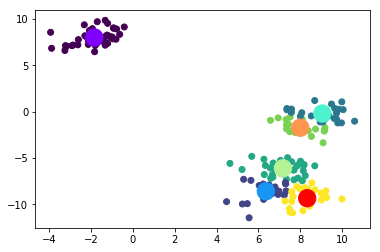

In [26]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_)

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c=kmeans.predict(kmeans.cluster_centers_),s=300,cmap='rainbow')

第二种错误,数据偏差  
trans = [[0.6,-0.6],[-0.4,0.8]]  
X2 = np.dot(X,trans)

In [27]:
X_train2 = np.dot(X_train,[[0.6,-0.6],[-0.4,0.8]])
kmeans = KMeans(n_clusters=4)

y_ = kmeans.fit(X_train2).predict(X_train2)

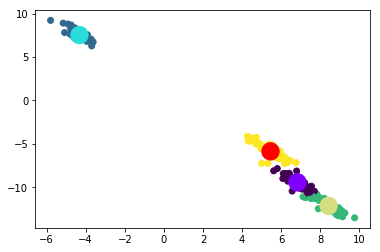

In [28]:
# 数据有偏差的错误
plt.scatter(X_train2[:,0],X_train2[:,1],c=y_)

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c=kmeans.predict(kmeans.cluster_centers_),s=300,cmap='rainbow')

第三个错误:标准偏差不相同cluster_std

In [29]:
X_train,y_train = make_blobs(180,centers=3,cluster_std=[0.5,1.5,2])

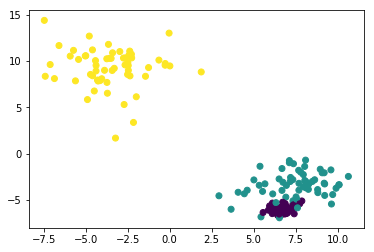

In [30]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

In [31]:
kmeans = KMeans(n_clusters=3)
y_ = kmeans.fit(X_train).predict(X_train)

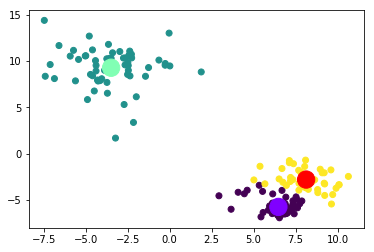

In [32]:
# 标准方差有问题的时候出现的错误
plt.scatter(X_train[:,0],X_train[:,1],c=y_)

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c=kmeans.predict(kmeans.cluster_centers_),s=300,cmap='rainbow')

第四个错误：样本数量不同

In [45]:
X_train,y_train = make_blobs(900,centers=3)
X_train

array([[ 0.00601901,  0.04290167],
       [ 4.52578235, -0.87438196],
       [ 3.42460072, -0.26806398],
       ...,
       [ 0.06463434,  0.0595575 ],
       [ 3.56749313, -0.15955447],
       [ 1.31335453,  1.30158993]])

In [46]:
index = np.argwhere(y_train == 0)
index

array([[  0],
       [  3],
       [  5],
       [  7],
       [  9],
       [ 11],
       [ 14],
       [ 19],
       [ 21],
       [ 22],
       [ 25],
       [ 26],
       [ 31],
       [ 32],
       [ 33],
       [ 38],
       [ 41],
       [ 42],
       [ 46],
       [ 48],
       [ 50],
       [ 51],
       [ 52],
       [ 57],
       [ 61],
       [ 62],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 72],
       [ 74],
       [ 80],
       [ 82],
       [ 84],
       [ 85],
       [ 86],
       [ 91],
       [ 94],
       [ 96],
       [ 97],
       [ 98],
       [103],
       [105],
       [107],
       [111],
       [113],
       [116],
       [120],
       [125],
       [126],
       [128],
       [131],
       [137],
       [140],
       [144],
       [146],
       [149],
       [154],
       [155],
       [156],
       [158],
       [167],
       [170],
       [173],
       [174],
       [183],
       [187],
       [192],
       [194],
       [195],
      

In [47]:
X_train[np.array([[  0],[ 2],[1]])]

array([[[ 0.00601901,  0.04290167]],

       [[ 3.42460072, -0.26806398]],

       [[ 4.52578235, -0.87438196]]])

In [48]:
x1 = X_train[np.argwhere(y_train == 0)]
x2 = X_train[np.argwhere(y_train == 1)]
x3 = X_train[np.argwhere(y_train == 2)]
print(x1.shape,x3.shape)

(300, 1, 2) (300, 1, 2)


In [51]:
x = np.concatenate((x1,x2[:150],x3[-50:]))
X_train_r = x.reshape((500,2))

In [52]:
y_train_r = [0]*300 + [1]*150 +[-1]*50

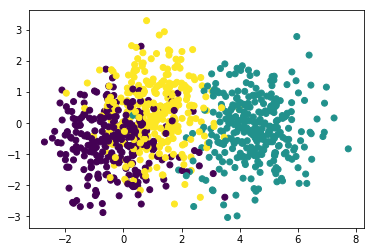

In [54]:
# 原图
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

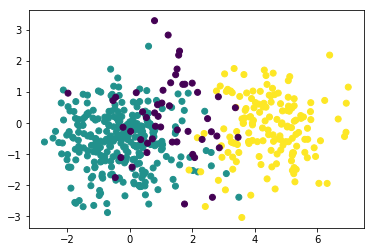

In [53]:
# 选完之后的图
plt.scatter(X_train_r[:,0],X_train_r[:,1],c=y_train_r)

In [55]:
kmeans = KMeans(n_clusters=3)
y_ = kmeans.fit(X_train_r).predict(X_train_r)

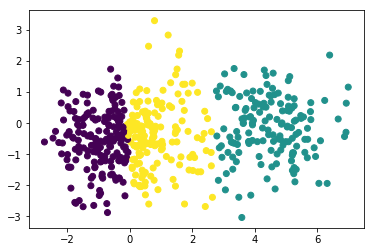

In [56]:
# 样本数量的错误
plt.scatter(X_train_r[:,0],X_train_r[:,1],c=y_)

### 4、K-Means图片颜色点分类

导包from sklearn.metrics import pairwise_distances_argmin

In [133]:
from sklearn.datasets import load_sample_image

from sklearn.metrics import pairwise_distances_argmin

加载图片/创建模型/训练数据/获取labels

D:\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
D:\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


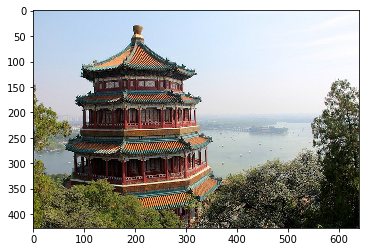

In [108]:
# 加载图片
image = load_sample_image('china.jpg')
plt.imshow(image)

In [109]:
# 图片的长,宽,像素点
w,h,d = image.shape

In [110]:
image.shape

(427, 640, 3)

In [111]:
# jpg/png
# jpg:0~255
# png:0~1
# 将图片进行归一化处理
image = np.array(image,dtype=float)/255

In [112]:
# 从图片中抽取64种眼色
color_clusters = 64

In [114]:
kemans = KMeans(n_clusters=color_clusters)

In [113]:
# 降维
X_train = image.reshape((-1,3))

In [115]:
#  Found array with dim 3. Estimator expected <= 2.
# 维度太高
kemans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=64, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

如果数据量太大,等的时间太长
随机从数据中选取一部分 
将数据打乱,随机选

from sklearn.utils import shuffle

打乱

X_train_s = shuffle(X_train)

X_train_s[:10000]

此时数据就可以去训练了

In [116]:
# 64个主色
# 需要将chainajpg所有的数据,添加标签,0,1,2......
labels = kemans.predict(X_train)

In [117]:
labels

array([38, 38, 38, ..., 41,  3,  3])

In [118]:
# 中心点
colors = kemans.cluster_centers_
colors.shape

(64, 3)

In [92]:
from pandas import DataFrame,Series

In [119]:
s = Series(labels)
len(s.unique())

64

使用pairwise_distances_argmin算法生成随机labels

创造方法，重新合成图片

In [120]:
def recreat_image(colors,labels,w,h,d):
    # 创建一个空白的image画面
    image = np.ones((w,h,d))
    labels_id = 0
    # 向空白的画面添加色素,64个主颜色
    # for循环进行添加
    for i in range(w):
        for j in range(h):
            image[i,j] = colors[labels[labels_id]]
            labels_id += 1
    return image

In [121]:
image_new = recreat_image(colors,labels,w,h,d)

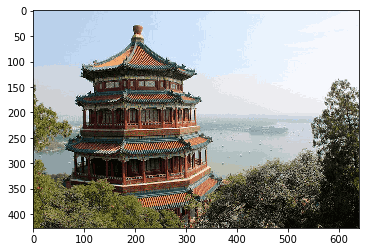

In [122]:
plt.imshow(image_new)

In [123]:
# 123kb
plt.imsave('64_image_new.jpg',image_new)

数据可视化

In [127]:
# 随机选取一系列的点
from sklearn.utils import shuffle

image_x = image.reshape((-1,3))
image_x.shape

# 顺序随机打乱
X_train_s = shuffle(image_x)
# image_x这张图片中所有的像素点,X_train_s也是所有的像素点,只不过顺序乱了.

In [128]:
#根据这64个随机选取的图片像素,对图片进行重造
colors = X_train_s[:64]

In [137]:
# 计算最小距离
# colors 随机选取的64个点
# image_x 是所有的像素点
# 一比较,会分为64份,将每一份归属哪一个会罗列出来
labels = pairwise_distances_argmin(colors,image_x,axis=0)
display(labels.shape,labels)

(273280,)

array([59, 59, 59, ..., 21, 31, 11], dtype=int64)

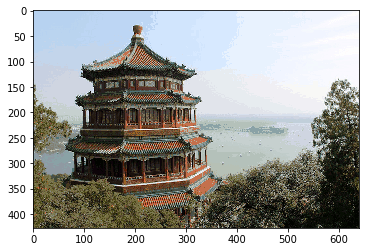

In [138]:
# 随机选取像素点生成的图片
image_new = recreat_image(colors,labels,w,h,d)
plt.imshow(image_new)

## 三、作业

### 1、分析ex7data2.mat文件

找出最佳聚类数目，并画出聚类的中心点

`
from scipy.io import loadmat
from sklearn.cluster import KMeans
data = loadmat('../data/ex7data2.mat')
X = data['X']
X.shape
`

### 2、图片压缩

使用聚类压缩图片

`
img = plt.imread('../data/bird_small.png')
img_shape = img.shape
img_shape
`

In [139]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

import numpy as np

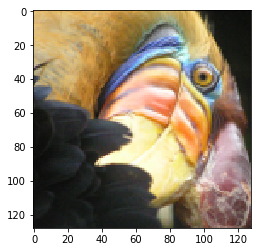

In [140]:
image_data = plt.imread('../data/bird_small.png')
plt.imshow(image_data)

In [141]:
image_data.shape

(128, 128, 3)

In [155]:
# 机器学习的数据,一般是二维
data = image_data.reshape((-1,3))
# 像素点
data.shape

(16384, 3)

In [156]:
# 提取主像素点
kmeans = KMeans(n_clusters=32)

kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=32, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [157]:
# 训练完之后会有4个中心点,主像素点
p_colors = kmeans.cluster_centers_

In [158]:
# 将像素点都已经归好类了
labels = kmeans.labels_
labels.shape

(16384,)

In [159]:
image_new = p_colors[labels]
image_new.shape

(16384, 3)

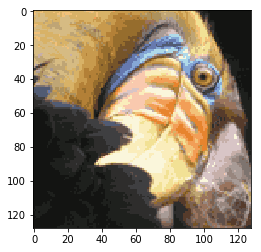

In [160]:
plt.imshow(image_new.reshape(image_data.shape))

In [154]:
a = np.array([2.2,3.14,279])
label = np.array([0,2,1,2,0,1,0,0,0,1,1,1])
a[label]

array([  2.2 , 279.  ,   3.14, 279.  ,   2.2 ,   3.14,   2.2 ,   2.2 ,
         2.2 ,   3.14,   3.14,   3.14])